## Exercise 8 - K-means clustering

- Download the dataset from [here](http://student.labranet.jamk.fi/~hantt/data/voice.csv)
- This dataset will be used in exercises 8, 9 and 10
- Dataset includes male and female voice samples with different features
- In this exercise you will use unsupervised machine learning method called K-means clustering for the dataset

1 Import all necessary libraries. Then load the dataset and save it to the dataframe. In this exercise you will use only meanfun (*average of fundamental frequency measured across acoustic signal*) and minfun (*minimum fundamental frequency measured across the acoustic signal*) columns. Filter data so that only forementioned columns will be included.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

# Read the voice.csv file
data = pd.read_csv('data_files/voice.csv')

# Filter data so that only forementioned columns will be included (only 'meanfun' and 'minfun')
data_filtered = data[['meanfun', 'minfun']]

# Display to verify
data_filtered


,meanfun,minfun
0,0.084279,0.015702
1,0.107937,0.015826
2,0.098706,0.015656
3,0.088965,0.017798
4,0.106398,0.016931
...,...,...
3163,0.182790,0.083770
3164,0.188980,0.034409
3165,0.209918,0.039506
3166,0.172375,0.034483


2 Run the predictions for the data so that it will be categorised for male and female data.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

# Read the voice.csv file
data = pd.read_csv('data_files/voice.csv')

# Filter data so that only forementioned columns will be included (only 'meanfun' and 'minfun')
data_filtered = data[['meanfun', 'minfun']]

# Display to verify
data_filtered

# In order to make predictions, we need to group the data by label and present the avarage
data.groupby("label").mean()

x = data.iloc[:, [13, 14]].values # (Using iloc with data file to select ":" all rows and '[13, 14]' to select columns at index position 13 and 14)

x[:5] # (This is to select the first five rows of the Numpy array 'x')

# Applying kmeans to the datasets / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'random', max_iter = 100, random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

# Get the cluster labels
cluster_labels = kmeans.labels_

# Assuming that there are some way to identify which cluster corresponds to male and female
# For example, if you have information that cluster 0 corresponds to male and cluster 1 corresponds to female
predicted_labels = ['male' if label == 0 else 'female' for label in cluster_labels]

# Add the predicted labels to dataFrame
data_filtered['predicted_gender'] = predicted_labels

# Display to verify
data_filtered

C:\Users\PHAT\AppData\Local\Temp\ipykernel_25304\4062559082.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['predicted_gender'] = predicted_labels


,meanfun,minfun,predicted_gender
0,0.084279,0.015702,male
1,0.107937,0.015826,male
2,0.098706,0.015656,male
3,0.088965,0.017798,male
4,0.106398,0.016931,male
...,...,...,...
3163,0.182790,0.083770,male
3164,0.188980,0.034409,male
3165,0.209918,0.039506,male
3166,0.172375,0.034483,male


3 Visualise the data so that clusters for male and female data will be presented in scatter plot (centroids should also be included).

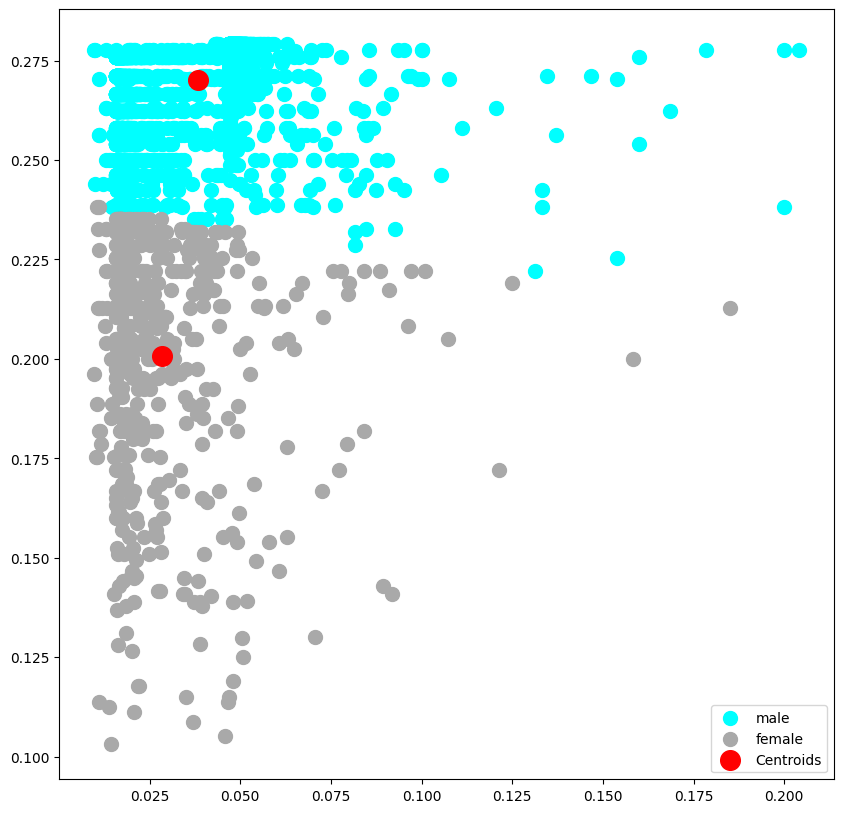

In [28]:
# cluster visualization
plt.figure(figsize=(10, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='cyan', label = 'male')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='darkgray', label = 'female')

# Add centroids to each cluster 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.legend()

4 Validate K-means clustering prediction results using confusion matrix.

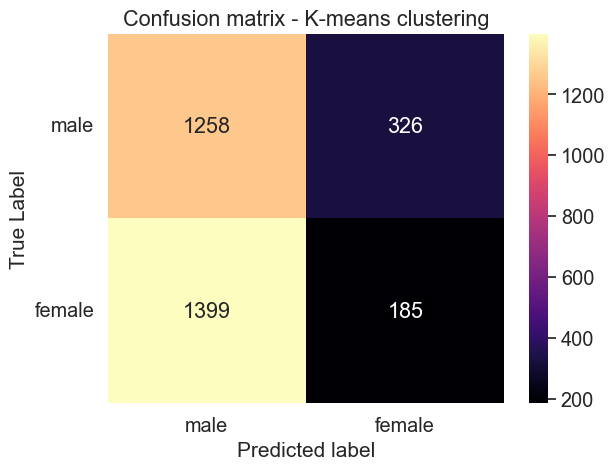

<Figure size 1000x700 with 0 Axes>

In [36]:
# Uing confusion matrix to validate K-means clustering prediction results
truth = []

for i in data['label']:
    if i == "male":
        truth.append(0)
    else:
        truth.append(1)

# Then, take both different labels for confusion matrix axles
labels = data['label'].unique()

# Confusion matrix definition
confusion_matrix = metrics.confusion_matrix(truth, y_kmeans)

# Input values for the confustion matrix
ax = plt.axes()
sns.set(font_scale = 1.3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot = True, fmt = "g", ax = ax, cmap = "magma")

# Add descriptive title for the figure and names for axles
ax.set_title('Confusion matrix - K-means clustering')
ax.set_xlabel("Predicted label", fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 15)
ax.set_yticklabels(labels, rotation = 0)
plt.show()
